## Problem Statement:
Imagine you're helping a small business understand what their Google Reviews are saying about them. Your task is to build a simple tool or workflow that does at least one of the following:
Extract top themes or topics from 50+ Google reviews
Identify and visualize sentiment trends over time
Auto-generate weekly review summary reports (good vs. bad, key phrases, action items)
Detect and flag customer complaints or negative experiences in real time
Classify reviews based on service, location, or product (if multi-unit/multi-service business)

In [1]:
# Step 1: Install VADER Sentiment Analyzer
!pip install vaderSentiment


In [2]:

# Step 2: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


In [3]:
# Step 3: Create sample Google Reviews data
sample_data = pd.DataFrame({
    'date': pd.date_range(start="2023-01-01", periods=12, freq='W'),
    'review': [
        "Amazing service and very friendly staff!",
        "The place was clean and the doctor was kind.",
        "Had a bad experience, the wait time was too long.",
        "Excellent care and prompt service.",
        "Terrible experience, will not come again.",
        "Staff was helpful but the procedure was painful.",
        "Loved the consultation! Very informative.",
        "Worst visit. They didn’t even check properly.",
        "Very professional and hygienic.",
        "Not satisfied with the cleaning service.",
        "Fantastic results! Will visit again.",
        "It was okay, not the best but acceptable."
    ]
})

In [4]:
# Step 4: Save to CSV
sample_data.to_csv("google_reviews.csv", index=False)

In [5]:


# Step 5: Load from CSV
data = pd.read_csv("google_reviews.csv")
data['date'] = pd.to_datetime(data['date'])
data = data.sort_values('date')
data

,date,review
0,2023-01-01,Amazing service and very friendly staff!
1,2023-01-08,The place was clean and the doctor was kind.
2,2023-01-15,"Had a bad experience, the wait time was too long."
3,2023-01-22,Excellent care and prompt service.
4,2023-01-29,"Terrible experience, will not come again."
5,2023-02-05,Staff was helpful but the procedure was painful.
6,2023-02-12,Loved the consultation! Very informative.
7,2023-02-19,Worst visit. They didn’t even check properly.
8,2023-02-26,Very professional and hygienic.
9,2023-03-05,Not satisfied with the cleaning service.


In [6]:
# Step 6: Sentiment analysis
analyzer = SentimentIntensityAnalyzer()
data['sentiment'] = data['review'].astype(str).apply(lambda x: analyzer.polarity_scores(x)['compound'])
data['sentiment'] 

0     0.8217
1     0.7269
2    -0.5423
3     0.7845
4    -0.4767
5    -0.4497
6     0.6360
7    -0.6249
8     0.0000
9    -0.3252
10    0.5983
11    0.2996
Name: sentiment, dtype: float64

In [7]:
# Step 7: Group by week for sentiment trend
data['week'] = data['date'].dt.to_period('W').apply(lambda r: r.start_time)
weekly_sentiment = data.groupby('week')['sentiment'].mean().reset_index()
weekly_sentiment 

,week,sentiment
0,2022-12-26,0.8217
1,2023-01-02,0.7269
2,2023-01-09,-0.5423
3,2023-01-16,0.7845
4,2023-01-23,-0.4767
5,2023-01-30,-0.4497
6,2023-02-06,0.6360
7,2023-02-13,-0.6249
8,2023-02-20,0.0000
9,2023-02-27,-0.3252


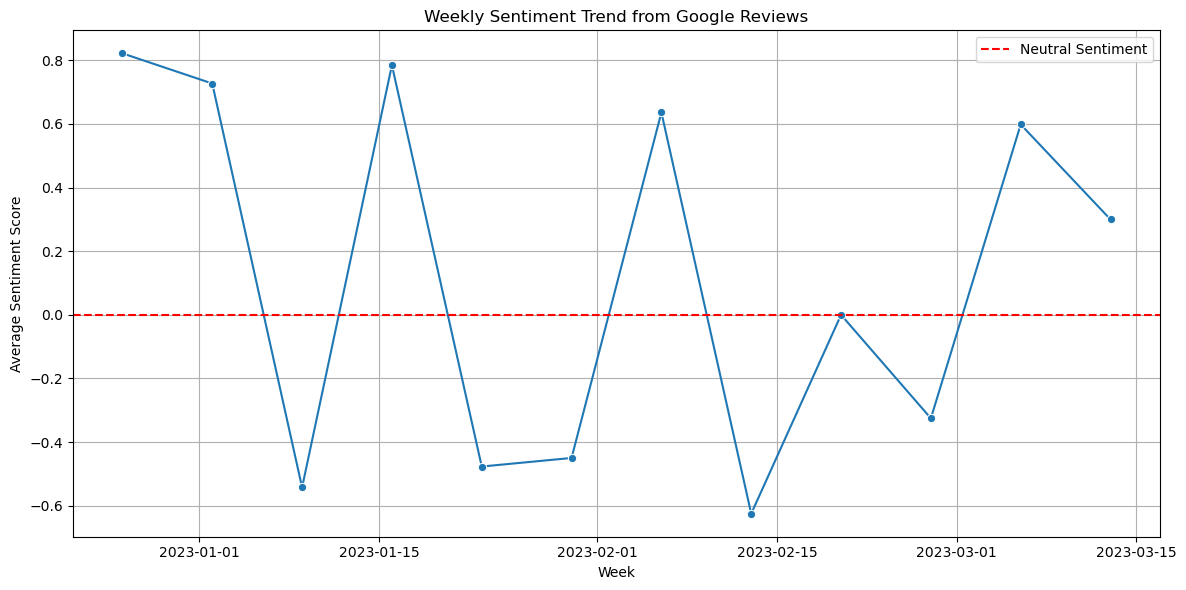

In [8]:
# Step 8: Visualize the sentiment trend
plt.figure(figsize=(12, 6))
sns.lineplot(data=weekly_sentiment, x='week', y='sentiment', marker='o')
plt.title("Weekly Sentiment Trend from Google Reviews")
plt.xlabel("Week")
plt.ylabel("Average Sentiment Score")
plt.axhline(0, color='red', linestyle='--', label='Neutral Sentiment')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()